ATTENTION: This notebook is based on old mock data. It is in this git repository for reference. However this material may be outdated for future users who are reading this.

# AWS Summer Project - ML/Analytics - Sean Slavich

This portion of the project is intened to provide insightful metrics that we can use to improve's AWS's low interview acceptance rate by employees of ~10%. Although no real data is present in this notebook, the aim is to utilize the code written and inpu the real data here to be assessed. Main points of emphasis are:

- Performing exploratory data analysis (EDA) on each dataframe
- Calculating acceptance rate
- Depicting an appropriate time-series plot
- Building a model that predicts acceptance rate based on other features



In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

bucket = 'ml-analytics-data-2022/Data'

skill_data_key = 'Employee_Skills.csv'
skill_data_location = 's3://{}/{}'.format(bucket, skill_data_key)

interviewee_data_key = 'Interviewee_Hiring.csv'
interviewee_data_location = 's3://{}/{}'.format(bucket, interviewee_data_key)

interviewer_data_key = 'Interviewer_Hiring.csv'
interviewer_data_location = 's3://{}/{}'.format(bucket, interviewer_data_key)

scheduling_data_key = 'Scheduling.csv'
scheduling_data_location = 's3://{}/{}'.format(bucket, scheduling_data_key)

voop_data_key = 'Voop_Data.csv'
voop_data_location = 's3://{}/{}'.format(bucket, voop_data_key)

emp_skills = pd.read_csv(skill_data_location)
interviewee_hiring = pd.read_csv(interviewee_data_location)
interviewer_hiring = pd.read_csv(interviewer_data_location)
scheduling = pd.read_csv(scheduling_data_location)
voop_data = pd.read_csv(voop_data_location)

# Data Dictionaries

Employee Skills Dictionary:
- Alias:
- Name:
- Skill:
- Skill Rating:
- Last Updated:

In [327]:
emp_skills

,Alias,Name,Skill,Skill_Rating,Last_Updated
0,ldelepine0,Linea Delepine,Compute and HPC - EC2 (Elastic Compute Cloud),1,2021-12-27T11:35:02Z
1,aharral1,Arielle Harral,Database - RDS SQL Server,5,2021-12-29T20:03:24Z
2,sdryburgh2,Shayne Dryburgh,ML/AI - Rekognition,1,2021-06-25T07:12:05Z
3,chugonet3,Claudetta Hugonet,Analytics - Lake Formation,3,2021-12-03T04:03:39Z
4,cfawthrop4,Cyrille Fawthrop,ML/AI - Forecast,1,2022-03-20T08:45:19Z
...,...,...,...,...,...
995,tvedntyevrn,Terrie Vedntyev,ML/AI - Forecast,5,2022-04-29T00:23:01Z
996,afrakero,Alvan Frake,ML/AI - SageMaker,1,2022-05-02T03:46:12Z
997,ttilleyrp,Torry Tilley,Compute and HPC - EC2 (Elastic Compute Cloud),4,2022-05-24T05:06:30Z
998,bwadwellrq,Bryn Wadwell,Analytics - Lake Formation,4,2022-06-11T22:42:18Z


Interviewee Hiring Dictionary:

- Interview ID
- Candidate Name
- Candidate ICMS_ID
- Role
- Type
- Level
- Preferred Time
- Preferred Day
- Last Updated

In [328]:
interviewee_hiring

,Interview_ID,Candidate_Name,Candidate_ICMS_ID,Role,Type,Level,Preferred_Time,Preferred_Day,Last_Updated
0,51092998,Agnese Normanton,7203708,EC2 Systems Engineer,Contract,L9,15:00,Tuesday,2022-02-04T16:18:37Z
1,99241636,Davey Abrams,15918070,Professional Services Consultant,Contract,L8,13:00,Monday,2022-03-20T01:04:55Z
2,64517874,Marrissa Langhor,67232318,EC2 Systems Engineer,Part-time,L6,14:00,Thursday,2022-03-18T12:56:21Z
3,75309134,Aurora Ireland,82904801,Machine Learning Engineer,Internship,L6,12:00,Tuesday,2021-11-26T16:06:23Z
4,31410407,Debora Greenall,76196522,Cloud Architect,Full-time,L6,16:00,Wednesday,2022-02-20T12:24:35Z
...,...,...,...,...,...,...,...,...,...
995,79716724,Burgess Baumer,39023047,Delivery Practice Manager,Part-time,L5,12:00,Monday,2022-05-08T22:34:48Z
996,36886778,Jocelyn Howman,40070522,Marketing Manager,Full-time,L5,10:00,Friday,2021-07-01T16:28:56Z
997,51097937,Ignacio Chivers,40720089,Security Engineer,Internship,L9,11:00,Monday,2022-04-22T09:03:40Z
998,88855859,Stillman Sproson,74769886,Software Engineer,Contract,L8,13:00,Friday,2022-05-19T20:51:46Z


Interviewer Hiring:

- Interview ID
- Employee Alias
- Interviewer Name
- Candidate Name
- Candidate ICMS_ID
- Role
- Type
- Level
- Preferred Time
- Preferred Day
- Last Updated

In [227]:
interviewer_hiring

,Interview_ID,Employee_Alias,Interviewer_Name,Candidate_Name,Candidate_ICMS_ID,Role,Type,Level,Preferred_Time,Preferred_Day,Last_Updated
0,51092998,ldelepine0,Linea Delepine,Agnese Normanton,7203708,Delivery Practice Manager,Contract,L4,10:00,Thursday,2021-08-20T23:11:27Z
1,99241636,aharral1,Arielle Harral,Davey Abrams,15918070,Software Development Engineer,Part-time,L7,14:00,Wednesday,2022-02-21T06:47:12Z
2,64517874,sdryburgh2,Shayne Dryburgh,Marrissa Langhor,67232318,Marketing Manager,Full-time,L6,14:00,Thursday,2021-12-28T15:00:16Z
3,75309134,chugonet3,Claudetta Hugonet,Aurora Ireland,82904801,Security Engineer,Contract,L9,16:00,Monday,2022-05-10T13:58:46Z
4,31410407,cfawthrop4,Cyrille Fawthrop,Debora Greenall,76196522,Cloud Support Engineer,Part-time,L5,12:00,Friday,2022-03-14T11:33:48Z
...,...,...,...,...,...,...,...,...,...,...,...
995,79716724,tvedntyevrn,Terrie Vedntyev,Burgess Baumer,39023047,Data Scientist,Part-time,L7,16:00,Tuesday,2021-06-21T06:27:20Z
996,36886778,afrakero,Alvan Frake,Jocelyn Howman,40070522,Solutions Architect,Internship,L8,14:00,Wednesday,2022-05-26T18:57:19Z
997,51097937,ttilleyrp,Torry Tilley,Ignacio Chivers,40720089,Product Manager,Contract,L4,14:00,Tuesday,2021-07-10T01:44:33Z
998,88855859,bwadwellrq,Bryn Wadwell,Stillman Sproson,74769886,EC2 Systems Engineer,Part-time,L9,14:00,Wednesday,2022-05-23T06:58:31Z


Scheduling:

- Employee Alias
- Timestamp
- Week #
- Slot (Hour)
- Modified
- Last Updated

In [228]:
scheduling

,Employee_Alias,Timestamp,Week_#,Slot_(Hour),Modified,Last Updated
0,ldelepine0,2021-12-08T20:21:20Z,4,16:00,Null,2022-04-26T10:54:21Z
1,aharral1,2021-08-18T07:24:37Z,49,12:00,Null,2022-04-24T09:18:34Z
2,sdryburgh2,2021-11-03T01:47:35Z,3,12:00,Null,2021-08-22T12:22:13Z
3,chugonet3,2022-01-06T09:58:41Z,23,10:00,Null,2022-06-14T09:56:02Z
4,cfawthrop4,2022-01-31T02:03:52Z,3,14:00,Null,2022-05-29T10:38:42Z
...,...,...,...,...,...,...
995,tvedntyevrn,2021-08-28T08:13:52Z,24,17:00,Null,2021-07-10T19:16:21Z
996,afrakero,2021-10-11T23:52:11Z,30,12:00,Null,2021-10-20T08:18:53Z
997,ttilleyrp,2022-05-22T23:47:06Z,18,12:00,Null,2021-06-30T17:00:33Z
998,bwadwellrq,2021-08-31T11:48:22Z,33,14:00,Null,2022-03-07T12:05:38Z


Voop Data:

- Interview ID
- Employee Alias
- Date
- Time
- Candidate Name
- Decision
- Duration
- Level: Candidate level
- Interview Type
- Communication Rating
- Leadership Rating
- Technical Rating
- Interest Rating
- Last Updated

In [229]:
voop_data

,Interview_ID,Employee_Alias,Date,Time,Candidate_Name,Decision,Duration,Level,Interview_Type,Communication_Rating,Leadership_Rating,Technical_Rating,Interest_Rating,Last_Updated
0,36977658,ldelepine0,4/11/22,13:00,Agnese Normanton,Strong No Hire,45,L9,Bar Raiser,4,5,6,2,2021-10-07T10:29:57Z
1,67484217,aharral1,11/3/21,9:00,Davey Abrams,Inclined,45,L8,Loop,6,5,6,1,2022-02-04T23:26:12Z
2,84630967,sdryburgh2,10/27/21,12:00,Marrissa Langhor,Inclined,60,L6,Phone Screen,3,5,2,6,2021-12-08T16:11:52Z
3,9888727,chugonet3,5/26/22,12:00,Aurora Ireland,Inclined,90,L6,Phone Screen,2,2,3,6,2021-08-08T16:13:47Z
4,60055003,cfawthrop4,5/13/22,15:00,Debora Greenall,Strong No Hire,30,L6,Loop,6,3,3,1,2022-02-21T21:28:31Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14556751,tvedntyevrn,8/20/21,17:00,Burgess Baumer,Strongly Inclined,30,L5,Bar Raiser,3,1,4,4,2021-12-15T02:44:08Z
996,83377630,afrakero,8/21/21,14:00,Jocelyn Howman,Strong No Hire,90,L5,Loop,1,4,5,6,2021-10-06T12:35:29Z
997,40462641,ttilleyrp,8/4/21,10:00,Ignacio Chivers,Not Inclined,30,L9,Loop,3,6,3,2,2021-11-09T00:25:06Z
998,78822341,bwadwellrq,1/19/22,9:00,Stillman Sproson,Not Inclined,90,L8,Phone Screen,4,5,3,6,2021-11-15T02:10:53Z


# Employee Profile

This section aims to provide clarity on who our employee's are and how we can leverage this data to improve the interview process.

In [230]:
emp_skills

,Alias,Name,Skill,Skill_Rating,Last_Updated
0,ldelepine0,Linea Delepine,Compute and HPC - EC2 (Elastic Compute Cloud),1,2021-12-27T11:35:02Z
1,aharral1,Arielle Harral,Database - RDS SQL Server,5,2021-12-29T20:03:24Z
2,sdryburgh2,Shayne Dryburgh,ML/AI - Rekognition,1,2021-06-25T07:12:05Z
3,chugonet3,Claudetta Hugonet,Analytics - Lake Formation,3,2021-12-03T04:03:39Z
4,cfawthrop4,Cyrille Fawthrop,ML/AI - Forecast,1,2022-03-20T08:45:19Z
...,...,...,...,...,...
995,tvedntyevrn,Terrie Vedntyev,ML/AI - Forecast,5,2022-04-29T00:23:01Z
996,afrakero,Alvan Frake,ML/AI - SageMaker,1,2022-05-02T03:46:12Z
997,ttilleyrp,Torry Tilley,Compute and HPC - EC2 (Elastic Compute Cloud),4,2022-05-24T05:06:30Z
998,bwadwellrq,Bryn Wadwell,Analytics - Lake Formation,4,2022-06-11T22:42:18Z


Find which employee skills are used the most for interviews:

In [310]:
prop_emps = emp_skills.groupby('Skill').count()['Alias']/ len(emp_skills)
prop_emps_sorted = prop_emps.sort_values(ascending=False)
prop_emps_sorted

Skill
Analytics - Lake Formation                       0.213
ML/AI - Rekognition                              0.123
Database - RDS SQL Server                        0.116
ML/AI - SageMaker                                0.114
ML/AI - Forecast                                 0.114
Mobile - Pinpoint                                0.112
Compute and HPC - EC2 (Elastic Compute Cloud)    0.108
Analytics - Kinesis                              0.100
Name: Alias, dtype: float64

In [311]:
emp_skills_labels = np.array(emp_skills.groupby('Skill').count().index)

Visualize these propotions of employee skills using a pie chart:

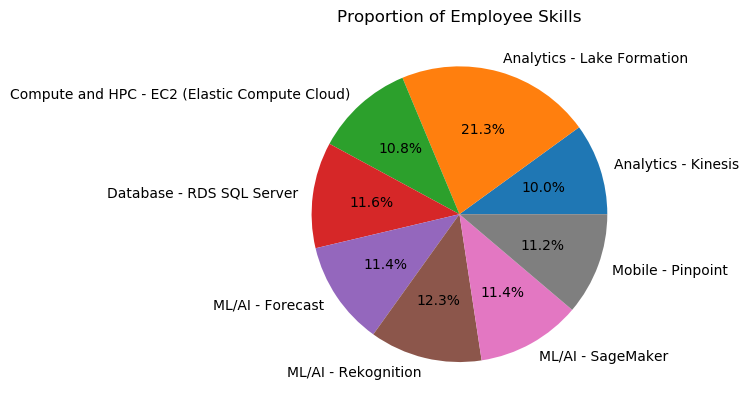

In [312]:
plt.pie(prop_emps, labels=emp_skills_labels, autopct='%1.1f%%')
plt.title('Proportion of Employee Skills')
plt.show()

Find which employee skills are used the most for interviews:

In [313]:
num_emps = emp_skills.groupby('Skill').count()['Alias']
num_emps_sorted = num_emps.sort_values(ascending=True)
num_emps_sorted

Skill
Analytics - Kinesis                              100
Compute and HPC - EC2 (Elastic Compute Cloud)    108
Mobile - Pinpoint                                112
ML/AI - Forecast                                 114
ML/AI - SageMaker                                114
Database - RDS SQL Server                        116
ML/AI - Rekognition                              123
Analytics - Lake Formation                       213
Name: Alias, dtype: int64

In [314]:
emp_skill_labels = (emp_skills.groupby('Skill').count().index).tolist()
emp_skill_labels

['Analytics - Kinesis',
 'Analytics - Lake Formation',
 'Compute and HPC - EC2 (Elastic Compute Cloud)',
 'Database - RDS SQL Server',
 'ML/AI - Forecast',
 'ML/AI - Rekognition',
 'ML/AI - SageMaker',
 'Mobile - Pinpoint']

Visualize these number of employee skills using a bar chart: NEED TO FIX

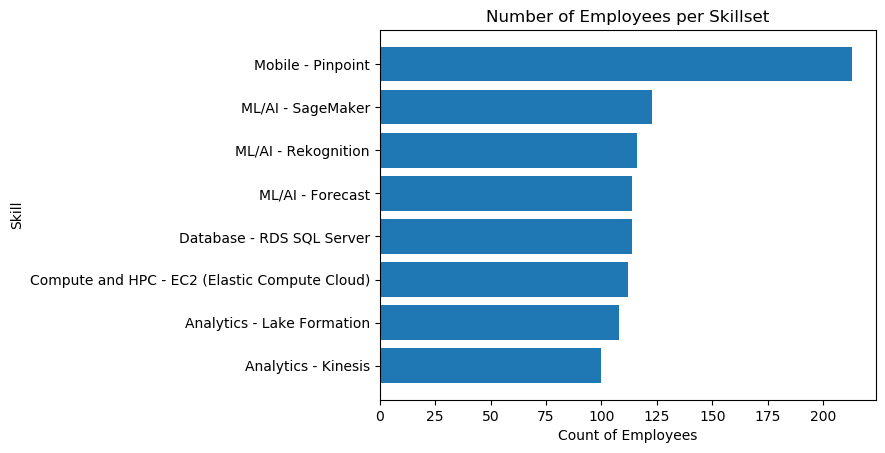

In [316]:
plt.barh(width=num_emps_sorted, y=emp_skill_labels)
plt.title('Number of Employees per Skillset')
plt.xlabel("Count of Employees")
plt.ylabel('Skill')
plt.show()

Find average skill rating per employee skill:

In [234]:
rating_avg = emp_skills.groupby('Skill').mean().reset_index()
rating_avg

,Skill,Skill_Rating
0,Analytics - Kinesis,2.630000
1,Analytics - Lake Formation,2.812207
2,Compute and HPC - EC2 (Elastic Compute Cloud),3.185185
3,Database - RDS SQL Server,3.163793
4,ML/AI - Forecast,3.210526
5,ML/AI - Rekognition,2.731707
6,ML/AI - SageMaker,3.017544
7,Mobile - Pinpoint,2.964286


Find the sorted amount of timeslots from greatest to least for an employee to interview:

In [321]:
sorted_timeslots = scheduling.groupby('Slot_(Hour)').count()['Employee_Alias']#.sort_values(by='Employee_Alias', ascending=False)
sorted_timeslots

Slot_(Hour)
10:00    105
11:00     91
12:00     97
13:00    112
14:00    100
15:00     88
16:00    107
17:00    109
8:00      91
9:00     100
Name: Employee_Alias, dtype: int64

In [322]:
sch_labels = (scheduling.groupby('Slot_(Hour)').count().index).tolist()
sch_labels

['10:00',
 '11:00',
 '12:00',
 '13:00',
 '14:00',
 '15:00',
 '16:00',
 '17:00',
 '8:00',
 '9:00']

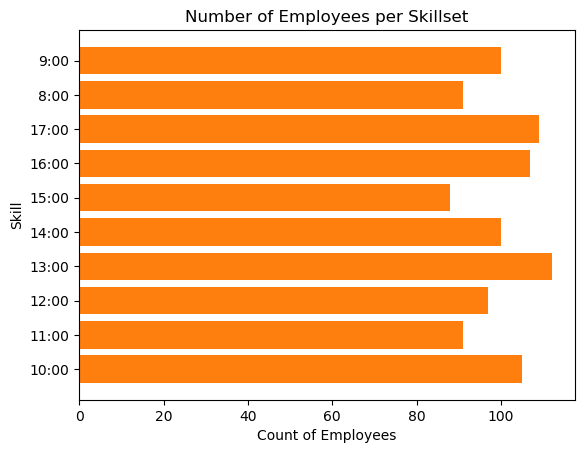

In [323]:
plt.barh(width=sorted_timeslots, y=sch_labels)
plt.title('Number of Employees per Skillset')
plt.xlabel("Count of Employees")
plt.ylabel('Skill')
plt.show()

Find top three most popular times for an employee to interview:

In [237]:
sorted_timeslots.head(3)

,Employee_Alias
Slot_(Hour),
13:00,112
17:00,109
16:00,107


1:00 PM, 5:00 PM, and 4:00 PM are the most popular times for employees to choose to interview a candidate.

Finding the most popular days of the week for employees to interview:

In [238]:
sorted_pref_days = interviewer_hiring.groupby('Preferred_Day').count()[['Interview_ID']].sort_values(by='Interview_ID', ascending=False)
sorted_pref_days

,Interview_ID
Preferred_Day,
Friday,205
Wednesday,203
Monday,199
Thursday,197
Tuesday,196


In [239]:
sorted_pref_days_list = interviewer_hiring.groupby('Preferred_Day').count()[['Interview_ID']].sort_values(by='Interview_ID', ascending=False)['Interview_ID'].tolist()
sorted_pref_days_list

[205, 203, 199, 197, 196]

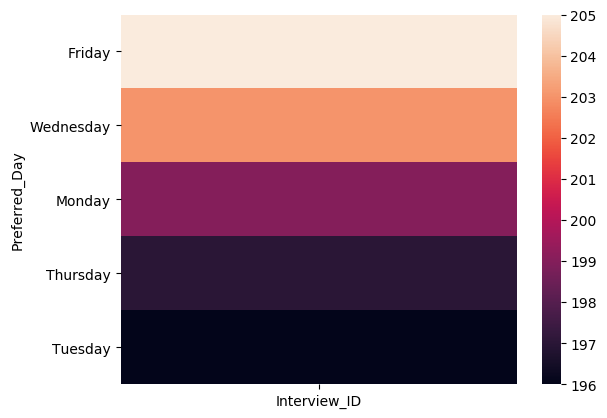

In [240]:
sns.heatmap(sorted_pref_days)
plt.show()

# Interview Profile

Convert voop_data['Date'] datetime to an extractable format for geting num_interviews:

In [241]:
voop_data['Date'] = pd.to_datetime(voop_data['Date'],format='%m/%d/%y')
voop_data['year'] = pd.DatetimeIndex(voop_data['Date']).year
voop_data['month'] = pd.DatetimeIndex(voop_data['Date']).month
voop_data

,Interview_ID,Employee_Alias,Date,Time,Candidate_Name,Decision,Duration,Level,Interview_Type,Communication_Rating,Leadership_Rating,Technical_Rating,Interest_Rating,Last_Updated,year,month
0,36977658,ldelepine0,2022-04-11,13:00,Agnese Normanton,Strong No Hire,45,L9,Bar Raiser,4,5,6,2,2021-10-07T10:29:57Z,2022,4
1,67484217,aharral1,2021-11-03,9:00,Davey Abrams,Inclined,45,L8,Loop,6,5,6,1,2022-02-04T23:26:12Z,2021,11
2,84630967,sdryburgh2,2021-10-27,12:00,Marrissa Langhor,Inclined,60,L6,Phone Screen,3,5,2,6,2021-12-08T16:11:52Z,2021,10
3,9888727,chugonet3,2022-05-26,12:00,Aurora Ireland,Inclined,90,L6,Phone Screen,2,2,3,6,2021-08-08T16:13:47Z,2022,5
4,60055003,cfawthrop4,2022-05-13,15:00,Debora Greenall,Strong No Hire,30,L6,Loop,6,3,3,1,2022-02-21T21:28:31Z,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14556751,tvedntyevrn,2021-08-20,17:00,Burgess Baumer,Strongly Inclined,30,L5,Bar Raiser,3,1,4,4,2021-12-15T02:44:08Z,2021,8
996,83377630,afrakero,2021-08-21,14:00,Jocelyn Howman,Strong No Hire,90,L5,Loop,1,4,5,6,2021-10-06T12:35:29Z,2021,8
997,40462641,ttilleyrp,2021-08-04,10:00,Ignacio Chivers,Not Inclined,30,L9,Loop,3,6,3,2,2021-11-09T00:25:06Z,2021,8
998,78822341,bwadwellrq,2022-01-19,9:00,Stillman Sproson,Not Inclined,90,L8,Phone Screen,4,5,3,6,2021-11-15T02:10:53Z,2022,1


Calculate the number of interviews done in 2021:

In [242]:
num_interviews_2021= len(voop_data[voop_data['year'] == 2021]['Date'])
num_interviews_2021

559

Calculate proportion of interviews done in 2021 over total number of interviews

In [243]:
num_interviews_2021 / len(voop_data)

0.559

Calculate the number of interviews done in 2022:

In [244]:
num_interviews_2022 = len(voop_data[voop_data['year'] == 2022]['Date'])
num_interviews_2022

441

Calculate proportion of interviews done in 2022 over total number of interviews:

In [245]:
num_interviews_2022 / len(voop_data)

0.441

Calculate the number of interviews sent to employees who decide to conduct or not conduct the interview:

In [246]:
interviewer_hiring.groupby('Employee_Alias').count()[['Interview_ID']]

,Interview_ID
Employee_Alias,
aantukit,1
aarstingall1z,1
aaustenh8,1
ababbsog,1
abagworthhs,1
...,...
yroberti93,1
zellingsi,1
zespadas35,1


Calculate the number of interviews actually conducted in Voop per alias:

In [247]:
voop_data.groupby('Employee_Alias').count()[['Interview_ID']]

,Interview_ID
Employee_Alias,
aantukit,1
aarstingall1z,1
aaustenh8,1
ababbsog,1
abagworthhs,1
...,...
yroberti93,1
zellingsi,1
zespadas35,1


Find number of INTERVIEWERS per level (from hiring data) - interviews that were sent to employees:

In [248]:
num_hr_level = interviewer_hiring.groupby('Level').count()[['Employee_Alias']]
num_hr_level

,Employee_Alias
Level,
L4,199
L5,160
L6,162
L7,157
L8,168
L9,154


Find proportion of INTERVIEWERS per level (from hiring data) - interviews that were sent to employees:

In [249]:
prop_hr_level = interviewer_hiring.groupby('Level').count()[['Employee_Alias']] / len(interviewer_hiring)
prop_hr_level_sorted = prop_hr_level.sort_values(by='Employee_Alias', ascending=False)
prop_hr_level_sorted

,Employee_Alias
Level,
L4,0.199
L8,0.168
L6,0.162
L5,0.160
L7,0.157
L9,0.154


Visualize these proportions of INTERVIEWERS per level (from hiring data):

In [250]:
int_level_labels = (interviewer_hiring.groupby('Level').count().index).tolist()
int_level_labels

['L4', 'L5', 'L6', 'L7', 'L8', 'L9']

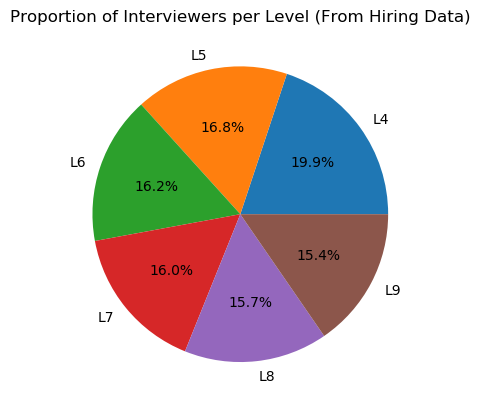

In [251]:
plt.pie(prop_hr_level_sorted['Employee_Alias'], labels=int_level_labels, autopct='%1.1f%%')
plt.title('Proportion of Interviewers per Level (From Hiring Data)')
plt.show()

Find number of INTERVIEWS per level (from hiring data) - interviews that were sent to employees:

In [283]:
num_hr_int_level = interviewer_hiring.groupby('Level').count()[['Interview_ID']].sort_values(by='Interview_ID', ascending=True)
num_hr_int_level

,Interview_ID
Level,
L9,154
L7,157
L5,160
L6,162
L8,168
L4,199


Find proportion of INTERVIEWS per level (from hiring data) - interviews that were sent to employees:

In [253]:
prop_hr_int_level = interviewer_hiring.groupby('Level').count()[['Interview_ID']] / len(interviewer_hiring)
prop_hr_int_level

,Interview_ID
Level,
L4,0.199
L5,0.160
L6,0.162
L7,0.157
L8,0.168
L9,0.154


Find number of INTERVIEWERS per level (from voop data) - interviews that actually happened:

In [280]:
num_voop_alias_level = voop_data.groupby('Level').count()[['Employee_Alias']]
num_voop_alias_level

,Employee_Alias
Level,
L4,161
L5,166
L6,157
L7,188
L8,156
L9,172


Visualize these number of INTERVIEWERS per level (from voop data):

In [256]:
voop_level_labels = (voop_data.groupby('Level').count().index).tolist()
voop_level_labels

['L4', 'L5', 'L6', 'L7', 'L8', 'L9']

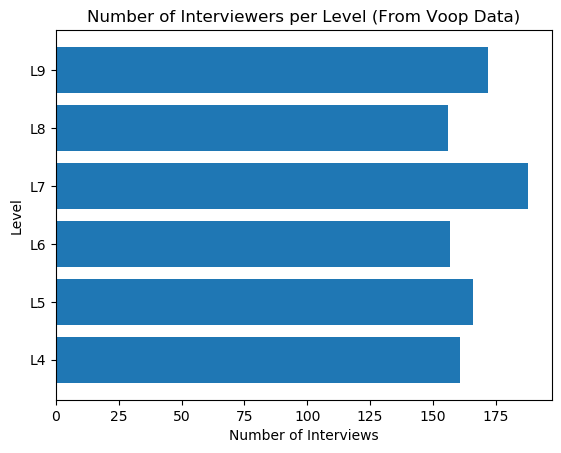

In [285]:
plt.barh(width=num_voop_alias_level['Employee_Alias'], y=voop_level_labels)
plt.title('Number of Interviewers per Level (From Voop Data)')
plt.ylabel('Level')
plt.xlabel('Number of Interviews')
plt.show()

Find proportion of INTERVIEWERS per level (from voop data) - interviews that actually happened:

In [255]:
prop_voop_alias_level = voop_data.groupby('Level').count()[['Employee_Alias']] / len(voop_data)
prop_voop_alias_level

,Employee_Alias
Level,
L4,0.161
L5,0.166
L6,0.157
L7,0.188
L8,0.156
L9,0.172


Find number of INTERVIEWS per level (from voop data) - interviews that actually happened:

In [258]:
num_voop_level = voop_data.groupby('Level').count()[['Interview_ID']]
num_voop_level

,Interview_ID
Level,
L4,161
L5,166
L6,157
L7,188
L8,156
L9,172


Find proportion of INTERVIEWS per level (from voop data) - interviews that actually happened:

In [259]:
prop_voop_level = voop_data.groupby('Level').count()[['Interview_ID']] / len(voop_data)
prop_voop_level

,Interview_ID
Level,
L4,0.161
L5,0.166
L6,0.157
L7,0.188
L8,0.156
L9,0.172


# Interview Profile (continued) Time Series Plot

This section is intended to depict the interaction between interviews and time

In [260]:
interview_dates_monthly = voop_data.groupby('month').count()[['Interview_ID']]
interview_dates_monthly

,Interview_ID
month,
1,66
2,79
3,80
4,92
5,68
6,94
7,100
8,89
9,87


Finding the number of interviews CONDUCTED per month (from voop_data):

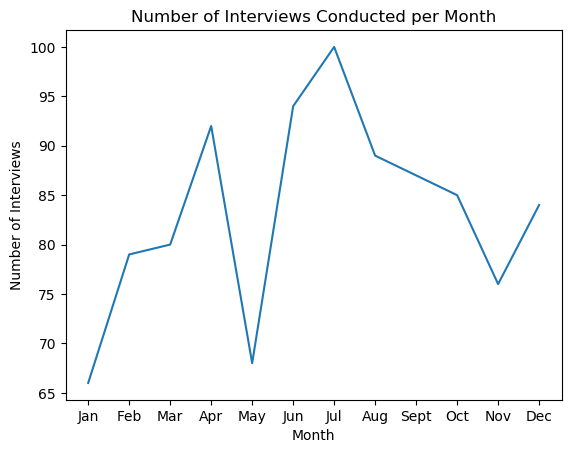

In [266]:
from pylab import *
x_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.plot(interview_dates_monthly.index, interview_dates_monthly)
plt.xticks(interview_dates_monthly.index, x_label)
plt.ylabel('Number of Interviews')
plt.xlabel('Month')
plt.title('Number of Interviews Conducted per Month')
plt.show()

There are peaks in April and July and dips in May and November. The peaks could be attributed to interviews for summer and fall internships. May and November could be slower hiring months in general, or there could be other factors in play that need to be analyzed.

In [262]:
interview_level_monthly.index.get_level_values(0).drop_duplicates()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

Finding the number of interviews CONDUCTED per level per month (from voop_data):

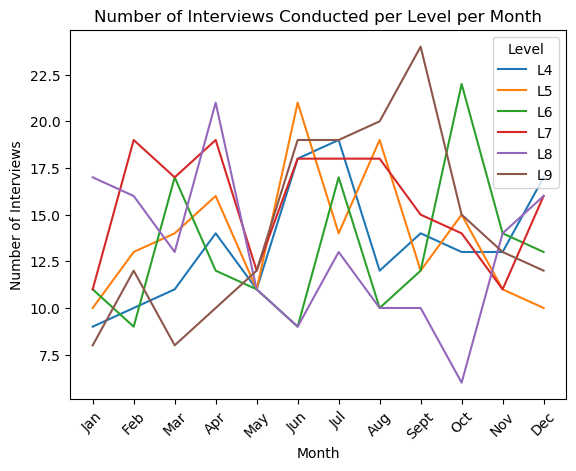

In [265]:
#interview_level_monthly = voop_data.groupby(['month', 'Level']).count()['Interview_ID']
#interview_level_monthly.unstack().plot(kind='line')
#plt.xticks(interview_level_monthly.index.get_level_values(0).drop_duplicates(), x_label, rotation=45)
#plt.show()

pd.crosstab(voop_data['month'], voop_data['Level']).plot(kind='line')
plt.xticks(interview_level_monthly.index.get_level_values(0).drop_duplicates(), x_label, rotation=45)
plt.ylabel('Number of Interviews')
plt.xlabel('Month')
plt.title('Number of Interviews Conducted per Level per Month')
plt.show()

Although this data may seem very hard to read, real trends can be imagined based on how real data would affect the number of interviews per level. L4 and L9 positions would most likely have very consistent low numbers due to the lack of interviewing these levels do. However, L5, L6, and L7 positions would depict the true trends month by month for number of interview conducted since they take on the brunt of interviewing responsibility.

In [89]:
int_hire_voop_merged = pd.merge(interviewer_hiring, voop_data,  how='left', left_on=['Employee_Alias'], right_on = ['Employee_Alias'])
int_hire_voop_merged

,Interview_ID_x,Employee_Alias,Interviewer_Name,Candidate_Name_x,Candidate_ICMS_ID,Role,Type,Level_x,Preferred_Time,Preferred_Day,...,Duration,Level_y,Interview_Type,Communication_Rating,Leadership_Rating,Technical_Rating,Interest_Rating,Last_Updated_y,year,month
0,51092998,ldelepine0,Linea Delepine,Agnese Normanton,7203708,Delivery Practice Manager,Contract,L4,10:00,Thursday,...,45,L9,Bar Raiser,4,5,6,2,2021-10-07T10:29:57Z,2022,4
1,99241636,aharral1,Arielle Harral,Davey Abrams,15918070,Software Development Engineer,Part-time,L7,14:00,Wednesday,...,45,L8,Loop,6,5,6,1,2022-02-04T23:26:12Z,2021,11
2,64517874,sdryburgh2,Shayne Dryburgh,Marrissa Langhor,67232318,Marketing Manager,Full-time,L6,14:00,Thursday,...,60,L6,Phone Screen,3,5,2,6,2021-12-08T16:11:52Z,2021,10
3,75309134,chugonet3,Claudetta Hugonet,Aurora Ireland,82904801,Security Engineer,Contract,L9,16:00,Monday,...,90,L6,Phone Screen,2,2,3,6,2021-08-08T16:13:47Z,2022,5
4,31410407,cfawthrop4,Cyrille Fawthrop,Debora Greenall,76196522,Cloud Support Engineer,Part-time,L5,12:00,Friday,...,30,L6,Loop,6,3,3,1,2022-02-21T21:28:31Z,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,79716724,tvedntyevrn,Terrie Vedntyev,Burgess Baumer,39023047,Data Scientist,Part-time,L7,16:00,Tuesday,...,30,L5,Bar Raiser,3,1,4,4,2021-12-15T02:44:08Z,2021,8
996,36886778,afrakero,Alvan Frake,Jocelyn Howman,40070522,Solutions Architect,Internship,L8,14:00,Wednesday,...,90,L5,Loop,1,4,5,6,2021-10-06T12:35:29Z,2021,8
997,51097937,ttilleyrp,Torry Tilley,Ignacio Chivers,40720089,Product Manager,Contract,L4,14:00,Tuesday,...,30,L9,Loop,3,6,3,2,2021-11-09T00:25:06Z,2021,8
998,88855859,bwadwellrq,Bryn Wadwell,Stillman Sproson,74769886,EC2 Systems Engineer,Part-time,L9,14:00,Wednesday,...,90,L8,Phone Screen,4,5,3,6,2021-11-15T02:10:53Z,2022,1


In [93]:
#pd.crosstab(int_hire_voop_merged['month'], int_hire_voop_merged['Role']).plot(kind='bar')
#plt.xticks(interview_level_monthly.index.get_level_values(0).drop_duplicates(), x_label, rotation=45)
#plt.title('Number of Interviews Conducted per Level per Month')
#plt.show()

# Candidate Profile

The aim of this section is to give a better idea of who we are interviewing to improve the interview process:

In [46]:
interviewee_hiring

,Interview_ID,Candidate_Name,Candidate_ICMS_ID,Role,Type,Level,Preferred_Time,Preferred_Day,Last_Updated
0,51092998,Agnese Normanton,7203708,EC2 Systems Engineer,Contract,L9,15:00,Tuesday,2022-02-04T16:18:37Z
1,99241636,Davey Abrams,15918070,Professional Services Consultant,Contract,L8,13:00,Monday,2022-03-20T01:04:55Z
2,64517874,Marrissa Langhor,67232318,EC2 Systems Engineer,Part-time,L6,14:00,Thursday,2022-03-18T12:56:21Z
3,75309134,Aurora Ireland,82904801,Machine Learning Engineer,Internship,L6,12:00,Tuesday,2021-11-26T16:06:23Z
4,31410407,Debora Greenall,76196522,Cloud Architect,Full-time,L6,16:00,Wednesday,2022-02-20T12:24:35Z
...,...,...,...,...,...,...,...,...,...
995,79716724,Burgess Baumer,39023047,Delivery Practice Manager,Part-time,L5,12:00,Monday,2022-05-08T22:34:48Z
996,36886778,Jocelyn Howman,40070522,Marketing Manager,Full-time,L5,10:00,Friday,2021-07-01T16:28:56Z
997,51097937,Ignacio Chivers,40720089,Security Engineer,Internship,L9,11:00,Monday,2022-04-22T09:03:40Z
998,88855859,Stillman Sproson,74769886,Software Engineer,Contract,L8,13:00,Friday,2022-05-19T20:51:46Z


Find breakdown of roles for which candidates are being interviewed:

In [47]:
prop_role_cand = interviewee_hiring.groupby('Role').count()[['Interview_ID']] / len(interviewee_hiring)
prop_role_cand_sorted = prop_role_cand.sort_values(by='Interview_ID', ascending=False)
prop_role_cand_sorted

,Interview_ID
Role,
Cloud Architect,0.067
Data Architect,0.057
Technical Account Manager,0.057
Data Engineer,0.054
Cloud Support Engineer,0.052
Machine Learning Engineer,0.049
Supply Chain Manager,0.049
Security Engineer,0.049
Professional Services Consultant,0.049


Visualize these propotions of candidate roles using a horizontal bar chart:

In [271]:
count_role_cand = interviewee_hiring.groupby('Role').count()[['Interview_ID']].sort_values(by='Interview_ID', ascending=True)
count_role_cand

,Interview_ID
Role,
Financial Analyst,38
Software Engineer,38
Marketing Manager,41
Software Development Engineer,42
Operations Manager,42
Program Manager,42
Data Scientist,43
Engagement Manager,43
Delivery Practice Manager,44


In [272]:
cand_role_labels = (interviewee_hiring.groupby('Role').count().index).tolist()
cand_role_labels

['Cloud Architect',
 'Cloud Support Engineer',
 'Data Architect',
 'Data Engineer',
 'Data Scientist',
 'Delivery Practice Manager',
 'EC2 Systems Engineer',
 'Engagement Manager',
 'Financial Analyst',
 'Machine Learning Engineer',
 'Marketing Manager',
 'Operations Manager',
 'Product Manager',
 'Professional Services Consultant',
 'Program Manager',
 'Security Engineer',
 'Software Development Engineer',
 'Software Engineer',
 'Solutions Architect',
 'Supply Chain Manager',
 'Technical Account Manager']

Visualize these propotions of candidate roles using a horizontal bar chart:

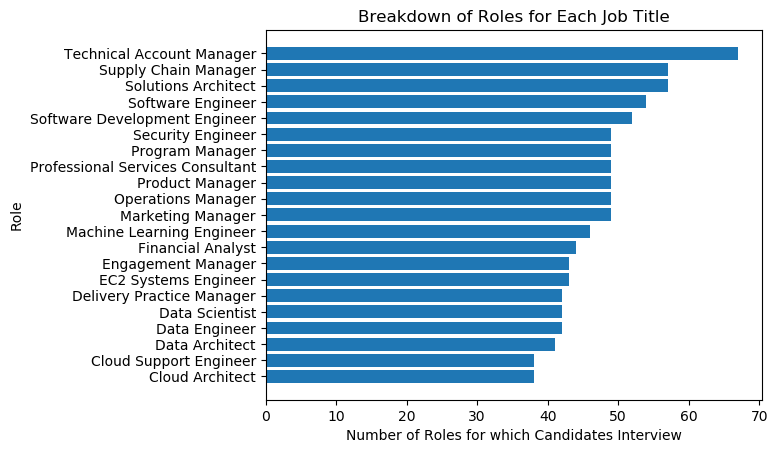

In [276]:
plt.barh(width=count_role_cand['Interview_ID'], y=cand_role_labels)
plt.title('Breakdown of Roles for Each Job Title')
plt.xlabel("Number of Roles for which Candidates Interview")
plt.ylabel('Role')
plt.show()

We can see that Technical Account Manager, Supply Chain Manager, and Solutions Architect are the positions for which candidates interview most. An increased demand/increased number of job postings for these positions or an influx of qualified candidates that could be interviewed may be responsible for this trend.

# Calculating Acceptance Rate (Feature Eng for Model)

To calculate employee acceptance rate, find the number of interviews accepted by each employee (group by alias) from the voop_data table. Then, find the number of interview requests sent out to each employee (group by alias) from the interviwer_hiring table. We can merge these two tables together and then create a new column highlighting each employee's acceptance rate.

Finding the number of voop interviews conducted per employee:

In [52]:
num_voop_int = voop_data.groupby('Employee_Alias').count()[['Interview_ID']].reset_index().fillna(0)
num_voop_int

,Employee_Alias,Interview_ID
0,aantukit,1
1,aarstingall1z,1
2,aaustenh8,1
3,ababbsog,1
4,abagworthhs,1
...,...,...
995,yroberti93,1
996,zellingsi,1
997,zespadas35,1
998,zjouanny71,1


Finding the number of interview requests sent out to each employee:

In [53]:
num_hire_int = interviewer_hiring.groupby('Employee_Alias').count()[['Interview_ID']].reset_index().fillna(0)
num_hire_int

,Employee_Alias,Interview_ID
0,aantukit,1
1,aarstingall1z,1
2,aaustenh8,1
3,ababbsog,1
4,abagworthhs,1
...,...,...
995,yroberti93,1
996,zellingsi,1
997,zespadas35,1
998,zjouanny71,1


Merging these two tables above together:

In [54]:
emp_acc_int = num_hire_int.merge(num_voop_int, on='Employee_Alias', how='left')
emp_acc_int

,Employee_Alias,Interview_ID_x,Interview_ID_y
0,aantukit,1,1
1,aarstingall1z,1,1
2,aaustenh8,1,1
3,ababbsog,1,1
4,abagworthhs,1,1
...,...,...,...
995,yroberti93,1,1
996,zellingsi,1,1
997,zespadas35,1,1
998,zjouanny71,1,1


Renaming the columns for clarity:

In [55]:
emp_acc_int.rename(columns = {'Interview_ID_x':'Count_of_Scheduled_Interviews', 'Interview_ID_y':'Count_of_Accepted_Interviews'}, inplace = True)
emp_acc_int

,Employee_Alias,Count_of_Scheduled_Interviews,Count_of_Accepted_Interviews
0,aantukit,1,1
1,aarstingall1z,1,1
2,aaustenh8,1,1
3,ababbsog,1,1
4,abagworthhs,1,1
...,...,...,...
995,yroberti93,1,1
996,zellingsi,1,1
997,zespadas35,1,1
998,zjouanny71,1,1


Merging the table above with the employee_skills table to later capture acceptance rate per skill:

In [56]:
emp_acc_skill_tbl = pd.merge(emp_acc_int, emp_skills,  how='left', left_on=['Employee_Alias'], right_on = ['Alias'])
emp_acc_skill_tbl

,Employee_Alias,Count_of_Scheduled_Interviews,Count_of_Accepted_Interviews,Alias,Name,Skill,Skill_Rating,Last_Updated
0,aantukit,1,1,aantukit,Abbe Antuk,ML/AI - Forecast,2,2021-08-30T13:58:25Z
1,aarstingall1z,1,1,aarstingall1z,Anastasia Arstingall,Mobile - Pinpoint,1,2022-05-14T13:05:19Z
2,aaustenh8,1,1,aaustenh8,Angeli Austen,ML/AI - Rekognition,2,2022-06-02T07:47:43Z
3,ababbsog,1,1,ababbsog,Aggie Babbs,Compute and HPC - EC2 (Elastic Compute Cloud),5,2021-09-25T06:43:48Z
4,abagworthhs,1,1,abagworthhs,Aubrey Bagworth,ML/AI - SageMaker,5,2022-04-18T09:12:25Z
...,...,...,...,...,...,...,...,...
995,yroberti93,1,1,yroberti93,Yale Roberti,Analytics - Lake Formation,1,2021-07-26T00:56:14Z
996,zellingsi,1,1,zellingsi,Zach Ellings,Database - RDS SQL Server,1,2021-10-21T16:49:04Z
997,zespadas35,1,1,zespadas35,Zena Espadas,ML/AI - SageMaker,4,2021-08-12T17:22:27Z
998,zjouanny71,1,1,zjouanny71,Zsazsa Jouanny,ML/AI - Rekognition,2,2021-10-28T14:26:51Z


Merging the table above with the interviewer_hiring table to later capture acceptance rate per level and acceptance rate per role:

In [57]:
emp_acc_skill_int_hire = pd.merge(emp_acc_skill_tbl, interviewer_hiring, how='left', left_on=['Employee_Alias'], right_on = ['Employee_Alias'])
emp_acc_skill_int_hire

,Employee_Alias,Count_of_Scheduled_Interviews,Count_of_Accepted_Interviews,Alias,Name,Skill,Skill_Rating,Last_Updated_x,Interview_ID,Interviewer_Name,Candidate_Name,Candidate_ICMS_ID,Role,Type,Level,Preferred_Time,Preferred_Day,Last_Updated_y
0,aantukit,1,1,aantukit,Abbe Antuk,ML/AI - Forecast,2,2021-08-30T13:58:25Z,39367780,Abbe Antuk,Carmelia Acosta,71588916,Technical Account Manager,Full-time,L8,14:00,Monday,2022-03-01T09:25:04Z
1,aarstingall1z,1,1,aarstingall1z,Anastasia Arstingall,Mobile - Pinpoint,1,2022-05-14T13:05:19Z,78838328,Anastasia Arstingall,Ernesto Dods,51740953,Operations Manager,Full-time,L7,15:00,Monday,2022-01-31T04:36:07Z
2,aaustenh8,1,1,aaustenh8,Angeli Austen,ML/AI - Rekognition,2,2022-06-02T07:47:43Z,69014079,Angeli Austen,Fidelio Varnals,38560249,Delivery Practice Manager,Contract,L5,9:00,Friday,2021-07-01T08:56:17Z
3,ababbsog,1,1,ababbsog,Aggie Babbs,Compute and HPC - EC2 (Elastic Compute Cloud),5,2021-09-25T06:43:48Z,29095642,Aggie Babbs,Anastasie Fessier,67393166,Cloud Support Engineer,Part-time,L4,15:00,Thursday,2021-12-01T00:22:45Z
4,abagworthhs,1,1,abagworthhs,Aubrey Bagworth,ML/AI - SageMaker,5,2022-04-18T09:12:25Z,68439136,Aubrey Bagworth,Karyl Lafflina,18400364,Technical Account Manager,Part-time,L4,13:00,Tuesday,2021-10-17T13:32:52Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,yroberti93,1,1,yroberti93,Yale Roberti,Analytics - Lake Formation,1,2021-07-26T00:56:14Z,93932350,Yale Roberti,Evy Truelove,28959740,Software Engineer,Contract,L6,12:00,Thursday,2022-01-31T15:53:03Z
996,zellingsi,1,1,zellingsi,Zach Ellings,Database - RDS SQL Server,1,2021-10-21T16:49:04Z,20784972,Zach Ellings,Eb Hawkswell,78453163,Data Engineer,Contract,L6,15:00,Thursday,2022-04-11T04:12:24Z
997,zespadas35,1,1,zespadas35,Zena Espadas,ML/AI - SageMaker,4,2021-08-12T17:22:27Z,60227282,Zena Espadas,Kerby Edeler,20919242,Cloud Architect,Full-time,L9,15:00,Tuesday,2021-12-08T07:46:46Z
998,zjouanny71,1,1,zjouanny71,Zsazsa Jouanny,ML/AI - Rekognition,2,2021-10-28T14:26:51Z,4884977,Zsazsa Jouanny,Vinnie Burfoot,95392950,Delivery Practice Manager,Full-time,L9,10:00,Friday,2021-10-27T00:08:48Z


Finding acceptance rate per employee and adding a column at the end of the merged dataframe:

In [58]:
emp_acc_skill_int_hire['Employee_Acceptance_Rate'] = emp_acc_skill_int_hire['Count_of_Accepted_Interviews'] / emp_acc_skill_int_hire['Count_of_Scheduled_Interviews'] 
emp_acc_skill_int_hire

,Employee_Alias,Count_of_Scheduled_Interviews,Count_of_Accepted_Interviews,Alias,Name,Skill,Skill_Rating,Last_Updated_x,Interview_ID,Interviewer_Name,Candidate_Name,Candidate_ICMS_ID,Role,Type,Level,Preferred_Time,Preferred_Day,Last_Updated_y,Employee_Acceptance_Rate
0,aantukit,1,1,aantukit,Abbe Antuk,ML/AI - Forecast,2,2021-08-30T13:58:25Z,39367780,Abbe Antuk,Carmelia Acosta,71588916,Technical Account Manager,Full-time,L8,14:00,Monday,2022-03-01T09:25:04Z,1.0
1,aarstingall1z,1,1,aarstingall1z,Anastasia Arstingall,Mobile - Pinpoint,1,2022-05-14T13:05:19Z,78838328,Anastasia Arstingall,Ernesto Dods,51740953,Operations Manager,Full-time,L7,15:00,Monday,2022-01-31T04:36:07Z,1.0
2,aaustenh8,1,1,aaustenh8,Angeli Austen,ML/AI - Rekognition,2,2022-06-02T07:47:43Z,69014079,Angeli Austen,Fidelio Varnals,38560249,Delivery Practice Manager,Contract,L5,9:00,Friday,2021-07-01T08:56:17Z,1.0
3,ababbsog,1,1,ababbsog,Aggie Babbs,Compute and HPC - EC2 (Elastic Compute Cloud),5,2021-09-25T06:43:48Z,29095642,Aggie Babbs,Anastasie Fessier,67393166,Cloud Support Engineer,Part-time,L4,15:00,Thursday,2021-12-01T00:22:45Z,1.0
4,abagworthhs,1,1,abagworthhs,Aubrey Bagworth,ML/AI - SageMaker,5,2022-04-18T09:12:25Z,68439136,Aubrey Bagworth,Karyl Lafflina,18400364,Technical Account Manager,Part-time,L4,13:00,Tuesday,2021-10-17T13:32:52Z,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,yroberti93,1,1,yroberti93,Yale Roberti,Analytics - Lake Formation,1,2021-07-26T00:56:14Z,93932350,Yale Roberti,Evy Truelove,28959740,Software Engineer,Contract,L6,12:00,Thursday,2022-01-31T15:53:03Z,1.0
996,zellingsi,1,1,zellingsi,Zach Ellings,Database - RDS SQL Server,1,2021-10-21T16:49:04Z,20784972,Zach Ellings,Eb Hawkswell,78453163,Data Engineer,Contract,L6,15:00,Thursday,2022-04-11T04:12:24Z,1.0
997,zespadas35,1,1,zespadas35,Zena Espadas,ML/AI - SageMaker,4,2021-08-12T17:22:27Z,60227282,Zena Espadas,Kerby Edeler,20919242,Cloud Architect,Full-time,L9,15:00,Tuesday,2021-12-08T07:46:46Z,1.0
998,zjouanny71,1,1,zjouanny71,Zsazsa Jouanny,ML/AI - Rekognition,2,2021-10-28T14:26:51Z,4884977,Zsazsa Jouanny,Vinnie Burfoot,95392950,Delivery Practice Manager,Full-time,L9,10:00,Friday,2021-10-27T00:08:48Z,1.0


# Acceptance Rate at a Granular Level

Finding the acceptance rate by skill:

In [59]:
emp_acc_skill_int_hire.groupby('Skill').mean()[['Employee_Acceptance_Rate']]

,Employee_Acceptance_Rate
Skill,
Analytics - Kinesis,1.0
Analytics - Lake Formation,1.0
Compute and HPC - EC2 (Elastic Compute Cloud),1.0
Database - RDS SQL Server,1.0
ML/AI - Forecast,1.0
ML/AI - Rekognition,1.0
ML/AI - SageMaker,1.0
Mobile - Pinpoint,1.0


Finding the acceptance rate by level:

In [60]:
emp_acc_skill_int_hire.groupby('Level').mean()[['Employee_Acceptance_Rate']]

,Employee_Acceptance_Rate
Level,
L4,1.0
L5,1.0
L6,1.0
L7,1.0
L8,1.0
L9,1.0


Finding the acceptance rate by role:

In [61]:
emp_acc_skill_int_hire.groupby('Role').mean()[['Employee_Acceptance_Rate']]

,Employee_Acceptance_Rate
Role,
Cloud Architect,1.0
Cloud Support Engineer,1.0
Data Architect,1.0
Data Engineer,1.0
Data Scientist,1.0
Delivery Practice Manager,1.0
EC2 Systems Engineer,1.0
Engagement Manager,1.0
Financial Analyst,1.0


# Merged Sequence (for Sahil)

In [354]:
new_emp_skill_int_hire = emp_acc_skill_int_hire.rename(columns={'Last_Updated_x':'Last_Updated_Emp_Skills', 'Last_Updated_y' : 'Last_Updated_Interviewer_Hiring'})
new_emp_skill_int_hire

,Employee_Alias,Count_of_Scheduled_Interviews,Count_of_Accepted_Interviews,Alias,Name,Skill,Skill_Rating,Last_Updated_Emp_Skills,Interview_ID,Interviewer_Name,Candidate_Name,Candidate_ICMS_ID,Role,Type,Level,Preferred_Time,Preferred_Day,Last_Updated_Interviewer_Hiring,Employee_Acceptance_Rate
0,aantukit,1,1,aantukit,Abbe Antuk,ML/AI - Forecast,2,2021-08-30T13:58:25Z,39367780,Abbe Antuk,Carmelia Acosta,71588916,Technical Account Manager,Full-time,L8,14:00,Monday,2022-03-01T09:25:04Z,1.0
1,aarstingall1z,1,1,aarstingall1z,Anastasia Arstingall,Mobile - Pinpoint,1,2022-05-14T13:05:19Z,78838328,Anastasia Arstingall,Ernesto Dods,51740953,Operations Manager,Full-time,L7,15:00,Monday,2022-01-31T04:36:07Z,1.0
2,aaustenh8,1,1,aaustenh8,Angeli Austen,ML/AI - Rekognition,2,2022-06-02T07:47:43Z,69014079,Angeli Austen,Fidelio Varnals,38560249,Delivery Practice Manager,Contract,L5,9:00,Friday,2021-07-01T08:56:17Z,1.0
3,ababbsog,1,1,ababbsog,Aggie Babbs,Compute and HPC - EC2 (Elastic Compute Cloud),5,2021-09-25T06:43:48Z,29095642,Aggie Babbs,Anastasie Fessier,67393166,Cloud Support Engineer,Part-time,L4,15:00,Thursday,2021-12-01T00:22:45Z,1.0
4,abagworthhs,1,1,abagworthhs,Aubrey Bagworth,ML/AI - SageMaker,5,2022-04-18T09:12:25Z,68439136,Aubrey Bagworth,Karyl Lafflina,18400364,Technical Account Manager,Part-time,L4,13:00,Tuesday,2021-10-17T13:32:52Z,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,yroberti93,1,1,yroberti93,Yale Roberti,Analytics - Lake Formation,1,2021-07-26T00:56:14Z,93932350,Yale Roberti,Evy Truelove,28959740,Software Engineer,Contract,L6,12:00,Thursday,2022-01-31T15:53:03Z,1.0
996,zellingsi,1,1,zellingsi,Zach Ellings,Database - RDS SQL Server,1,2021-10-21T16:49:04Z,20784972,Zach Ellings,Eb Hawkswell,78453163,Data Engineer,Contract,L6,15:00,Thursday,2022-04-11T04:12:24Z,1.0
997,zespadas35,1,1,zespadas35,Zena Espadas,ML/AI - SageMaker,4,2021-08-12T17:22:27Z,60227282,Zena Espadas,Kerby Edeler,20919242,Cloud Architect,Full-time,L9,15:00,Tuesday,2021-12-08T07:46:46Z,1.0
998,zjouanny71,1,1,zjouanny71,Zsazsa Jouanny,ML/AI - Rekognition,2,2021-10-28T14:26:51Z,4884977,Zsazsa Jouanny,Vinnie Burfoot,95392950,Delivery Practice Manager,Full-time,L9,10:00,Friday,2021-10-27T00:08:48Z,1.0


Joining on interviewee_hiring table

In [369]:
pd.set_option('display.max_columns', None)
three_table_join = pd.merge(new_emp_skill_int_hire, interviewee_hiring, how='left', left_on=['Interview_ID'], right_on = ['Interview_ID'])
three_table_join

,Employee_Alias,Count_of_Scheduled_Interviews,Count_of_Accepted_Interviews,Alias,Name,Skill,Skill_Rating,Last_Updated_Emp_Skills,Interview_ID,Interviewer_Name,Candidate_Name_x,Candidate_ICMS_ID_x,Role_x,Type_x,Level_x,Preferred_Time_x,Preferred_Day_x,Last_Updated_Interviewer_Hiring,Employee_Acceptance_Rate,Candidate_Name_y,Candidate_ICMS_ID_y,Role_y,Type_y,Level_y,Preferred_Time_y,Preferred_Day_y,Last_Updated
0,aantukit,1,1,aantukit,Abbe Antuk,ML/AI - Forecast,2,2021-08-30T13:58:25Z,39367780,Abbe Antuk,Carmelia Acosta,71588916,Technical Account Manager,Full-time,L8,14:00,Monday,2022-03-01T09:25:04Z,1.0,Carmelia Acosta,71588916,Technical Account Manager,Contract,L5,17:00,Friday,2021-08-07T04:27:46Z
1,aarstingall1z,1,1,aarstingall1z,Anastasia Arstingall,Mobile - Pinpoint,1,2022-05-14T13:05:19Z,78838328,Anastasia Arstingall,Ernesto Dods,51740953,Operations Manager,Full-time,L7,15:00,Monday,2022-01-31T04:36:07Z,1.0,Ernesto Dods,51740953,Data Scientist,Part-time,L8,10:00,Friday,2021-07-24T09:25:16Z
2,aaustenh8,1,1,aaustenh8,Angeli Austen,ML/AI - Rekognition,2,2022-06-02T07:47:43Z,69014079,Angeli Austen,Fidelio Varnals,38560249,Delivery Practice Manager,Contract,L5,9:00,Friday,2021-07-01T08:56:17Z,1.0,Fidelio Varnals,38560249,Machine Learning Engineer,Internship,L6,13:00,Monday,2021-09-07T02:36:53Z
3,ababbsog,1,1,ababbsog,Aggie Babbs,Compute and HPC - EC2 (Elastic Compute Cloud),5,2021-09-25T06:43:48Z,29095642,Aggie Babbs,Anastasie Fessier,67393166,Cloud Support Engineer,Part-time,L4,15:00,Thursday,2021-12-01T00:22:45Z,1.0,Anastasie Fessier,67393166,EC2 Systems Engineer,Contract,L4,11:00,Monday,2022-03-26T10:14:06Z
4,abagworthhs,1,1,abagworthhs,Aubrey Bagworth,ML/AI - SageMaker,5,2022-04-18T09:12:25Z,68439136,Aubrey Bagworth,Karyl Lafflina,18400364,Technical Account Manager,Part-time,L4,13:00,Tuesday,2021-10-17T13:32:52Z,1.0,Karyl Lafflina,18400364,Security Engineer,Full-time,L6,9:00,Thursday,2021-12-28T22:49:34Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,yroberti93,1,1,yroberti93,Yale Roberti,Analytics - Lake Formation,1,2021-07-26T00:56:14Z,93932350,Yale Roberti,Evy Truelove,28959740,Software Engineer,Contract,L6,12:00,Thursday,2022-01-31T15:53:03Z,1.0,Evy Truelove,28959740,Professional Services Consultant,Internship,L9,16:00,Tuesday,2022-03-03T18:54:00Z
996,zellingsi,1,1,zellingsi,Zach Ellings,Database - RDS SQL Server,1,2021-10-21T16:49:04Z,20784972,Zach Ellings,Eb Hawkswell,78453163,Data Engineer,Contract,L6,15:00,Thursday,2022-04-11T04:12:24Z,1.0,Eb Hawkswell,78453163,Software Engineer,Internship,L4,8:00,Monday,2021-11-21T06:25:44Z
997,zespadas35,1,1,zespadas35,Zena Espadas,ML/AI - SageMaker,4,2021-08-12T17:22:27Z,60227282,Zena Espadas,Kerby Edeler,20919242,Cloud Architect,Full-time,L9,15:00,Tuesday,2021-12-08T07:46:46Z,1.0,Kerby Edeler,20919242,Financial Analyst,Part-time,L7,11:00,Thursday,2022-01-21T04:38:13Z
998,zjouanny71,1,1,zjouanny71,Zsazsa Jouanny,ML/AI - Rekognition,2,2021-10-28T14:26:51Z,4884977,Zsazsa Jouanny,Vinnie Burfoot,95392950,Delivery Practice Manager,Full-time,L9,10:00,Friday,2021-10-27T00:08:48Z,1.0,Vinnie Burfoot,95392950,Supply Chain Manager,Internship,L7,11:00,Wednesday,2022-01-24T16:44:16Z


In [371]:
pd.set_option('display.max_columns', None)
four_table_join = pd.merge(three_table_join, scheduling, how='left', left_on=['Employee_Alias'], right_on = ['Employee_Alias'])
four_table_join

,Employee_Alias,Count_of_Scheduled_Interviews,Count_of_Accepted_Interviews,Alias,Name,Skill,Skill_Rating,Last_Updated_Emp_Skills,Interview_ID,Interviewer_Name,Candidate_Name_x,Candidate_ICMS_ID_x,Role_x,Type_x,Level_x,Preferred_Time_x,Preferred_Day_x,Last_Updated_Interviewer_Hiring,Employee_Acceptance_Rate,Candidate_Name_y,Candidate_ICMS_ID_y,Role_y,Type_y,Level_y,Preferred_Time_y,Preferred_Day_y,Last_Updated,Timestamp,Week_#,Slot_(Hour),Modified,Last Updated
0,aantukit,1,1,aantukit,Abbe Antuk,ML/AI - Forecast,2,2021-08-30T13:58:25Z,39367780,Abbe Antuk,Carmelia Acosta,71588916,Technical Account Manager,Full-time,L8,14:00,Monday,2022-03-01T09:25:04Z,1.0,Carmelia Acosta,71588916,Technical Account Manager,Contract,L5,17:00,Friday,2021-08-07T04:27:46Z,2021-08-22T17:56:08Z,28,15:00,Null,2021-09-18T19:47:11Z
1,aarstingall1z,1,1,aarstingall1z,Anastasia Arstingall,Mobile - Pinpoint,1,2022-05-14T13:05:19Z,78838328,Anastasia Arstingall,Ernesto Dods,51740953,Operations Manager,Full-time,L7,15:00,Monday,2022-01-31T04:36:07Z,1.0,Ernesto Dods,51740953,Data Scientist,Part-time,L8,10:00,Friday,2021-07-24T09:25:16Z,2022-05-30T22:27:16Z,47,16:00,Null,2021-10-03T01:58:06Z
2,aaustenh8,1,1,aaustenh8,Angeli Austen,ML/AI - Rekognition,2,2022-06-02T07:47:43Z,69014079,Angeli Austen,Fidelio Varnals,38560249,Delivery Practice Manager,Contract,L5,9:00,Friday,2021-07-01T08:56:17Z,1.0,Fidelio Varnals,38560249,Machine Learning Engineer,Internship,L6,13:00,Monday,2021-09-07T02:36:53Z,2021-07-01T04:00:29Z,21,17:00,Null,2022-05-27T13:21:05Z
3,ababbsog,1,1,ababbsog,Aggie Babbs,Compute and HPC - EC2 (Elastic Compute Cloud),5,2021-09-25T06:43:48Z,29095642,Aggie Babbs,Anastasie Fessier,67393166,Cloud Support Engineer,Part-time,L4,15:00,Thursday,2021-12-01T00:22:45Z,1.0,Anastasie Fessier,67393166,EC2 Systems Engineer,Contract,L4,11:00,Monday,2022-03-26T10:14:06Z,2022-04-02T14:08:21Z,52,16:00,Null,2022-03-21T15:14:29Z
4,abagworthhs,1,1,abagworthhs,Aubrey Bagworth,ML/AI - SageMaker,5,2022-04-18T09:12:25Z,68439136,Aubrey Bagworth,Karyl Lafflina,18400364,Technical Account Manager,Part-time,L4,13:00,Tuesday,2021-10-17T13:32:52Z,1.0,Karyl Lafflina,18400364,Security Engineer,Full-time,L6,9:00,Thursday,2021-12-28T22:49:34Z,2021-08-12T03:59:17Z,36,8:00,TRUE,2022-01-20T11:58:01Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,yroberti93,1,1,yroberti93,Yale Roberti,Analytics - Lake Formation,1,2021-07-26T00:56:14Z,93932350,Yale Roberti,Evy Truelove,28959740,Software Engineer,Contract,L6,12:00,Thursday,2022-01-31T15:53:03Z,1.0,Evy Truelove,28959740,Professional Services Consultant,Internship,L9,16:00,Tuesday,2022-03-03T18:54:00Z,2022-04-25T15:52:45Z,28,15:00,Null,2021-11-11T23:27:46Z
996,zellingsi,1,1,zellingsi,Zach Ellings,Database - RDS SQL Server,1,2021-10-21T16:49:04Z,20784972,Zach Ellings,Eb Hawkswell,78453163,Data Engineer,Contract,L6,15:00,Thursday,2022-04-11T04:12:24Z,1.0,Eb Hawkswell,78453163,Software Engineer,Internship,L4,8:00,Monday,2021-11-21T06:25:44Z,2022-05-05T03:49:37Z,17,13:00,Null,2022-03-18T22:51:43Z
997,zespadas35,1,1,zespadas35,Zena Espadas,ML/AI - SageMaker,4,2021-08-12T17:22:27Z,60227282,Zena Espadas,Kerby Edeler,20919242,Cloud Architect,Full-time,L9,15:00,Tuesday,2021-12-08T07:46:46Z,1.0,Kerby Edeler,20919242,Financial Analyst,Part-time,L7,11:00,Thursday,2022-01-21T04:38:13Z,2021-10-06T14:19:32Z,2,9:00,Null,2021-09-25T00:04:45Z
998,zjouanny71,1,1,zjouanny71,Zsazsa Jouanny,ML/AI - Rekognition,2,2021-10-28T14:26:51Z,4884977,Zsazsa Jouanny,Vinnie Burfoot,95392950,Delivery Practice Manager,Full-time,L9,10:00,Friday,2021-10-27T00:08:48Z,1.0,Vinnie Burfoot,95392950,Supply Chain Manager,Internship,L7,11:00,Wednesday,2022-01-24T16:44:16Z,2021-09-14T04:38:03Z,43,16:00,Null,2021-10-06T14:53:12Z


In [370]:
interviewer_hiring

,Interview_ID,Employee_Alias,Interviewer_Name,Candidate_Name,Candidate_ICMS_ID,Role,Type,Level,Preferred_Time,Preferred_Day,Last_Updated
0,51092998,ldelepine0,Linea Delepine,Agnese Normanton,7203708,Delivery Practice Manager,Contract,L4,10:00,Thursday,2021-08-20T23:11:27Z
1,99241636,aharral1,Arielle Harral,Davey Abrams,15918070,Software Development Engineer,Part-time,L7,14:00,Wednesday,2022-02-21T06:47:12Z
2,64517874,sdryburgh2,Shayne Dryburgh,Marrissa Langhor,67232318,Marketing Manager,Full-time,L6,14:00,Thursday,2021-12-28T15:00:16Z
3,75309134,chugonet3,Claudetta Hugonet,Aurora Ireland,82904801,Security Engineer,Contract,L9,16:00,Monday,2022-05-10T13:58:46Z
4,31410407,cfawthrop4,Cyrille Fawthrop,Debora Greenall,76196522,Cloud Support Engineer,Part-time,L5,12:00,Friday,2022-03-14T11:33:48Z
...,...,...,...,...,...,...,...,...,...,...,...
995,79716724,tvedntyevrn,Terrie Vedntyev,Burgess Baumer,39023047,Data Scientist,Part-time,L7,16:00,Tuesday,2021-06-21T06:27:20Z
996,36886778,afrakero,Alvan Frake,Jocelyn Howman,40070522,Solutions Architect,Internship,L8,14:00,Wednesday,2022-05-26T18:57:19Z
997,51097937,ttilleyrp,Torry Tilley,Ignacio Chivers,40720089,Product Manager,Contract,L4,14:00,Tuesday,2021-07-10T01:44:33Z
998,88855859,bwadwellrq,Bryn Wadwell,Stillman Sproson,74769886,EC2 Systems Engineer,Part-time,L9,14:00,Wednesday,2022-05-23T06:58:31Z


In [398]:
pd.set_option('display.max_columns', None)
all_tbls_joined = pd.merge(four_table_join, voop_data, how='left', left_on=['Employee_Alias'], right_on = ['Employee_Alias'])
all_tbls_drop = all_tbls_joined.drop(columns=['Candidate_Name_y', 'Candidate_Name_x', 'Interview_ID_y', 'Candidate_ICMS_ID_y', 'Alias', 'Name'])
all_tbls_renamed =all_tbls_drop.rename(columns={'Interview_ID_x': 'Interview_ID', 'Role_x': 'Interviewer_Role', 'Type_x': 'Interviewer_Role_Type',
                                'Level_x': 'Interviewer_Level', 'Preferred_Time_x': 'Interviewer_Preferred_Time', 'Preferred_Day_x':'Interviewer_Preferred_Day',
                                'Role_y': 'Interviewee_Role', 'Type_y': 'Interviewee_Type', 'Preferred_Time_y': 'Interviewee_Preferred_Time',
                                'Preferred_Day_y': 'Interviewee_Preferred_Day', 'Level_y': 'Interviewee_Level', 'Candidate_ICMS_ID_x': 'Candidate_ICMS_ID',
                                'Last Updated': 'Scheduling_Last_Updated', 'Last_Updated_x': 'Last_Updated_Interviewee_Hiring', 'Last_Updated_y': 'Last_Updated_Voop',
                    'Date': 'Date_of_Voop_Interview', 'Timestamp' : 'Timestamp_Scheduling'})
all_tbls_renamed

,Employee_Alias,Count_of_Scheduled_Interviews,Count_of_Accepted_Interviews,Skill,Skill_Rating,Last_Updated_Emp_Skills,Interview_ID,Interviewer_Name,Candidate_ICMS_ID,Interviewer_Role,Interviewer_Role_Type,Interviewer_Level,Interviewer_Preferred_Time,Interviewer_Preferred_Day,Last_Updated_Interviewer_Hiring,Employee_Acceptance_Rate,Interviewee_Role,Interviewee_Type,Interviewee_Level,Interviewee_Preferred_Time,Interviewee_Preferred_Day,Last_Updated_Interviewee_Hiring,Timestamp_Scheduling,Week_#,Slot_(Hour),Modified,Scheduling_Last_Updated,Date_of_Voop_Interview,Time,Candidate_Name,Decision,Duration,Level,Interview_Type,Communication_Rating,Leadership_Rating,Technical_Rating,Interest_Rating,Last_Updated_Voop
0,aantukit,1,1,ML/AI - Forecast,2,2021-08-30T13:58:25Z,39367780,Abbe Antuk,71588916,Technical Account Manager,Full-time,L8,14:00,Monday,2022-03-01T09:25:04Z,1.0,Technical Account Manager,Contract,L5,17:00,Friday,2021-08-07T04:27:46Z,2021-08-22T17:56:08Z,28,15:00,Null,2021-09-18T19:47:11Z,3/12/22,10:00,Carmelia Acosta,Strongly Inclined,90,L5,Phone Screen,6,4,1,2,2022-03-07T05:59:47Z
1,aarstingall1z,1,1,Mobile - Pinpoint,1,2022-05-14T13:05:19Z,78838328,Anastasia Arstingall,51740953,Operations Manager,Full-time,L7,15:00,Monday,2022-01-31T04:36:07Z,1.0,Data Scientist,Part-time,L8,10:00,Friday,2021-07-24T09:25:16Z,2022-05-30T22:27:16Z,47,16:00,Null,2021-10-03T01:58:06Z,12/25/21,12:00,Ernesto Dods,Not Inclined,45,L8,Phone Screen,3,6,6,6,2021-07-16T01:54:29Z
2,aaustenh8,1,1,ML/AI - Rekognition,2,2022-06-02T07:47:43Z,69014079,Angeli Austen,38560249,Delivery Practice Manager,Contract,L5,9:00,Friday,2021-07-01T08:56:17Z,1.0,Machine Learning Engineer,Internship,L6,13:00,Monday,2021-09-07T02:36:53Z,2021-07-01T04:00:29Z,21,17:00,Null,2022-05-27T13:21:05Z,10/6/21,12:00,Fidelio Varnals,Not Inclined,30,L6,Phone Screen,1,4,1,3,2022-06-16T10:25:23Z
3,ababbsog,1,1,Compute and HPC - EC2 (Elastic Compute Cloud),5,2021-09-25T06:43:48Z,29095642,Aggie Babbs,67393166,Cloud Support Engineer,Part-time,L4,15:00,Thursday,2021-12-01T00:22:45Z,1.0,EC2 Systems Engineer,Contract,L4,11:00,Monday,2022-03-26T10:14:06Z,2022-04-02T14:08:21Z,52,16:00,Null,2022-03-21T15:14:29Z,1/27/22,10:00,Anastasie Fessier,Strong No Hire,30,L4,Bar Raiser,6,4,3,6,2021-08-28T10:47:21Z
4,abagworthhs,1,1,ML/AI - SageMaker,5,2022-04-18T09:12:25Z,68439136,Aubrey Bagworth,18400364,Technical Account Manager,Part-time,L4,13:00,Tuesday,2021-10-17T13:32:52Z,1.0,Security Engineer,Full-time,L6,9:00,Thursday,2021-12-28T22:49:34Z,2021-08-12T03:59:17Z,36,8:00,TRUE,2022-01-20T11:58:01Z,10/17/21,13:00,Karyl Lafflina,Strongly Inclined,30,L6,Loop,2,6,3,1,2022-05-12T22:12:31Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,yroberti93,1,1,Analytics - Lake Formation,1,2021-07-26T00:56:14Z,93932350,Yale Roberti,28959740,Software Engineer,Contract,L6,12:00,Thursday,2022-01-31T15:53:03Z,1.0,Professional Services Consultant,Internship,L9,16:00,Tuesday,2022-03-03T18:54:00Z,2022-04-25T15:52:45Z,28,15:00,Null,2021-11-11T23:27:46Z,12/5/21,11:00,Evy Truelove,Strong No Hire,45,L9,Phone Screen,5,3,4,4,2021-09-22T22:19:41Z
996,zellingsi,1,1,Database - RDS SQL Server,1,2021-10-21T16:49:04Z,20784972,Zach Ellings,78453163,Data Engineer,Contract,L6,15:00,Thursday,2022-04-11T04:12:24Z,1.0,Software Engineer,Internship,L4,8:00,Monday,2021-11-21T06:25:44Z,2022-05-05T03:49:37Z,17,13:00,Null,2022-03-18T22:51:43Z,12/28/21,16:00,Eb Hawkswell,Not Inclined,90,L4,Loop,6,4,4,2,2022-03-27T12:58:29Z
997,zespadas35,1,1,ML/AI - SageMaker,4,2021-08-12T17:22:27Z,60227282,Zena Espadas,20919242,Cloud Architect,Full-time,L9,15:00,Tuesday,2021-12-08T07:46:46Z,1.0,Financial Analyst,Part-time,L7,11:00,Thursday,2022-01-21T04:38:13Z,2021-10-06T14:19:32Z,2,9:00,Null,2021-09-25T00:04:45Z,8/8/21,17:00,Kerby Edeler,Inclined,45,L7,Phone Screen,5,6,4,5,2022-04-05T08:35:25Z
998,zjouanny71,1,1,ML/AI - Rekognition,2,2021-10-28T14:26:51Z,4

In [403]:
all_tbls_renamed.to_csv(r'C:\Users\sslavich\Desktop\export_dataframe.csv', index=False, header=True)
print(all_tbls_renamed)

    Employee_Alias  Count_of_Scheduled_Interviews  \
0         aantukit                              1   
1    aarstingall1z                              1   
2        aaustenh8                              1   
3         ababbsog                              1   
4      abagworthhs                              1   
..             ...                            ...   
995     yroberti93                              1   
996      zellingsi                              1   
997     zespadas35                              1   
998     zjouanny71                              1   
999        zpashfu                              1   

     Count_of_Accepted_Interviews  \
0                               1   
1                               1   
2                               1   
3                               1   
4                               1   
..                            ...   
995                             1   
996                             1   
997                           

# One-Hot Encoding Inclination Rate for Hiring Decision

This line of code is to output a separate table for clarity that cannot be outputted by just using pd.get_dummies. Pd.get_dummies is later used to find the incline rate when it comes to making a hiring decision:

In [170]:
ohe_decision_data = voop_data.copy() 

In [171]:
from sklearn.preprocessing import OneHotEncoder

def ohe_hr_decision(data):
    
    data = data.copy()
    columns = ['Decision']
    for column in columns:
        values = data[column].unique()
        for value in values:
            data['x0_' + value] = (data[column] == value).astype(int)
        data = data.drop(column, axis=1)
        return data

In [172]:
ohe_decision_data = ohe_hr_decision(ohe_decision_data)
ohe_decision_data.filter(regex='^x0').head(10)

,x0_Strong No Hire,x0_Inclined,x0_Not Inclined,x0_Strongly Inclined
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
5,1,0,0,0
6,0,0,1,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


Using pd.get_dummies to one-hot encode the decision column. This will allow us to find the correlation between this data:

In [291]:
ohe_voop = pd.get_dummies(data=voop_data, columns=['Decision'])
ohe_voop

,Interview_ID,Employee_Alias,Date,Time,Candidate_Name,Duration,Level,Interview_Type,Communication_Rating,Leadership_Rating,Technical_Rating,Interest_Rating,Last_Updated,year,month,Decision_Inclined,Decision_Not Inclined,Decision_Strong No Hire,Decision_Strongly Inclined
0,36977658,ldelepine0,2022-04-11,13:00,Agnese Normanton,45,L9,Bar Raiser,4,5,6,2,2021-10-07T10:29:57Z,2022,4,0,0,1,0
1,67484217,aharral1,2021-11-03,9:00,Davey Abrams,45,L8,Loop,6,5,6,1,2022-02-04T23:26:12Z,2021,11,1,0,0,0
2,84630967,sdryburgh2,2021-10-27,12:00,Marrissa Langhor,60,L6,Phone Screen,3,5,2,6,2021-12-08T16:11:52Z,2021,10,1,0,0,0
3,9888727,chugonet3,2022-05-26,12:00,Aurora Ireland,90,L6,Phone Screen,2,2,3,6,2021-08-08T16:13:47Z,2022,5,1,0,0,0
4,60055003,cfawthrop4,2022-05-13,15:00,Debora Greenall,30,L6,Loop,6,3,3,1,2022-02-21T21:28:31Z,2022,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14556751,tvedntyevrn,2021-08-20,17:00,Burgess Baumer,30,L5,Bar Raiser,3,1,4,4,2021-12-15T02:44:08Z,2021,8,0,0,0,1
996,83377630,afrakero,2021-08-21,14:00,Jocelyn Howman,90,L5,Loop,1,4,5,6,2021-10-06T12:35:29Z,2021,8,0,0,1,0
997,40462641,ttilleyrp,2021-08-04,10:00,Ignacio Chivers,30,L9,Loop,3,6,3,2,2021-11-09T00:25:06Z,2021,8,0,1,0,0
998,78822341,bwadwellrq,2022-01-19,9:00,Stillman Sproson,90,L8,Phone Screen,4,5,3,6,2021-11-15T02:10:53Z,2022,1,0,1,0,0


Finding the correlation between the data:

In [292]:
ohe_voop.corr()

,Interview_ID,Duration,Communication_Rating,Leadership_Rating,Technical_Rating,Interest_Rating,year,month,Decision_Inclined,Decision_Not Inclined,Decision_Strong No Hire,Decision_Strongly Inclined
Interview_ID,1.000000,0.031874,-0.008811,-0.035882,0.040652,0.022638,0.040096,-0.013939,-0.027804,0.080322,-0.006728,-0.050631
Duration,0.031874,1.000000,0.024018,0.012837,-0.028799,-0.047363,-0.014895,0.038596,-0.003814,-0.004598,0.005081,0.003340
Communication_Rating,-0.008811,0.024018,1.000000,0.022312,0.005410,0.008700,0.047889,-0.040818,-0.014229,-0.013893,0.025511,0.002310
Leadership_Rating,-0.035882,0.012837,0.022312,1.000000,-0.064960,-0.023524,-0.042454,0.031980,-0.009750,0.023025,-0.003195,-0.011488
Technical_Rating,0.040652,-0.028799,0.005410,-0.064960,1.000000,-0.020144,-0.031080,0.030259,-0.025949,0.062150,-0.010207,-0.029744
Interest_Rating,0.022638,-0.047363,0.008700,-0.023524,-0.020144,1.000000,0.024335,-0.019165,-0.038783,0.014525,0.030584,-0.008940
year,0.040096,-0.014895,0.047889,-0.042454,-0.031080,0.024335,1.000000,-0.850656,-0.002238,-0.017569,-0.008185,0.029050
month,-0.013939,0.038596,-0.040818,0.031980,0.030259,-0.019165,-0.850656,1.000000,-0.010891,0.050767,-0.003585,-0.039176
Decision_Inclined,-0.027804,-0.003814,-0.014229,-0.009750,-0.025949,-0.038783,-0.002238,-0.010891,1.000000,-0.332978,-0.314076,-0.299313
Decision_Not Inclined,0.080322,-0.004598,-0.013893,0.023025,0.062150,0.014525,-0.017569,0.050767,-0.332978,1.000000,-0.368635,-0.351308


Based on the table above, we can see that all four decision types have nearly 0 correlation with duration. This is expected as this data is randomized. With a real dataset, a stronger positive or negative correlation is likely.

Finding the total number candidates that are inclined to be hired:

In [202]:
np.sum(ohe_voop['Decision_Inclined'])

221

Finding the total number candidates that are strongly inclined to be hired:

In [203]:
np.sum(ohe_voop['Decision_Strongly Inclined'])

240

Finding the inclination rate by adding the two previous numbers and dividing by the total number of interviews:

In [200]:
(np.sum(ohe_voop['Decision_Inclined']) + np.sum(ohe_voop['Decision_Strongly Inclined'])) / len(ohe_voop)

0.461

Finding the total number candidates that are not inclined to be hired:

In [205]:
np.sum(ohe_voop['Decision_Not Inclined'])

281

Finding the total number candidates that are a strong no hire:

In [204]:
np.sum(ohe_voop['Decision_Strong No Hire'])

258

Finding the declination rate by adding the two previous numbers and dividing by the total number of interviews:

In [207]:
(np.sum(ohe_voop['Decision_Not Inclined']) + np.sum(ohe_voop['Decision_Strong No Hire'])) / len(ohe_voop)

0.539

In [ ]:
incline_df = pd.DataFrame(columns = ['Decision'])

# Chi Squared Test of Independence (On Decision)

Find if duration of interview has any impact on hiring decision:

In [66]:
!pip install researchpy

In [67]:
import researchpy as rp
import scipy.stats as stats
import statsmodels.api as sm

rp.summary_cat(voop_data[['Decision', 'Duration']])

,Variable,Outcome,Count,Percent
0,Decision,Not Inclined,281,28.1
1,,Strong No Hire,258,25.8
2,,Strongly Inclined,240,24.0
3,,Inclined,221,22.1
4,Duration,30,261,26.1
5,,45,260,26.0
6,,90,247,24.7
7,,60,232,23.2


In [68]:
crosstab = pd.crosstab(voop_data['Duration'], voop_data['Decision'])
crosstab

Decision,Inclined,Not Inclined,Strong No Hire,Strongly Inclined
Duration,,,,
30,61,63,71,66
45,56,84,63,57
60,48,71,57,56
90,56,63,67,61


In [69]:
crosstab, test_results, expected = rp.crosstab(voop_data['Duration'], voop_data['Decision'], test='chi-square', expected_freqs=True, prop='cell')
crosstab

Decision                                                     
Decision Inclined Not Inclined Strong No Hire Strongly Inclined    All
Duration                                                              
30            6.1          6.3            7.1               6.6   26.1
45            5.6          8.4            6.3               5.7   26.0
60            4.8          7.1            5.7               5.6   23.2
90            5.6          6.3            6.7               6.1   24.7
All          22.1         28.1           25.8              24.0  100.0

In [70]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,6.1296
1,p-value =,0.7269
2,Cramer's V =,0.0452


Since Cramer's value is below 0.05, there is no (or a very weak) relationship between duration of the interview and the hiring decision.